In [110]:
import numpy as np

In [111]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

We start by downloading the mnist dataset from the keras datasets api

In [112]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [113]:
train_x[0].shape

(28, 28)

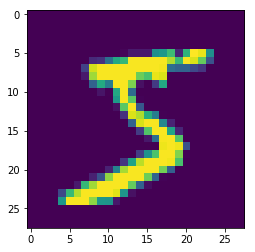

In [114]:
plt.imshow(train_x[0])

In [115]:
train_y[0]

5

We transform the (28,28) dimensional matrix to a vector of size (28*28,1)

In [116]:
def preprocess(x):
    x = x.reshape((x.shape[0], x.shape[1] * x.shape[2]))
    x = x[:] / 255.
    return x 

def to_categorical(y, num_classes):
    res = np.zeros((y.shape[0], num_classes))
    res[np.arange(y.shape[0]), y] = 1.
    return res

In [117]:
train_x = preprocess(train_x)
train_y = to_categorical(train_y, 10)

In [118]:
print(train_x.shape)
print(train_y.shape)

(60000, 784)
(60000, 10)


In [119]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Softmax is an activation function that outputs probabilities for multi-class classification problems. It is similar to a sigmoid output which is often used for outputing a single probability. Softmax makes sure that the sum of the individual probabilities equals to 1. 

Softmax formula:

$p_i = \dfrac{e^{a_i}}{\sum^N_{k=1} e^{a_k}}$ - Equation 1: Softmax

By using the exponential function it gives more weight to higher probabilities. It gives an advantage to higher values. Therefore it's called a soft max function. A max function would give 100% probability to the highest value, softmax is somewhere in between max and an actual probability as given by equation 2:

$p_i = \dfrac{a_i}{\sum^N_{k=1} a_k}$ - Equation 2: Standard linear probability

There is however a problem with using the regular softmax function, as it uses an exponential function chances are high that it will encounter an overflow. To overcome this, we can subtract the a values by its maximum.


In [120]:
def softmax(a):
    exp_term = np.exp(a - np.max(a, axis=1, keepdims=True)) #-max to Prevent overflow
    return exp_term/np.sum(exp_term, axis=1, keepdims=True)

def cross_entropy_loss(outputs, y):
    outputs = np.clip(outputs, 1e-7, 1 - 1e-7) #Prevent divide by zero warnings
    loss = np.sum(y * -np.log(outputs), axis=1)
    return np.sum(loss) / outputs.shape[0] #average loss of all samples
    
def relu(a):
    return np.maximum(0, a)

In [121]:
a = np.array([[1,2], [3,4]])
print(np.sum(a, axis=1, keepdims=False))

[3 7]


In [122]:
def forward_pass(a, W, B, activation):
    z = a.dot(W) + B
    next_a = activation(z)
    return next_a

In [123]:
class model():
    def __init__(self, input_data):
        print(input_data.shape)
        self.input_data = input_data
        self.m, self.n = input_data.shape
        self.first_layer_nodes = 128
        self.second_layer_nodes = 128
        self.output_layer_nodes = 10

        self.W1 = np.random.random((self.n, self.first_layer_nodes))
        self.B1 = np.random.random((1, self.first_layer_nodes))
        self.W2 = np.random.random((self.first_layer_nodes, self.second_layer_nodes))
        self.B2 = np.random.random((1, self.second_layer_nodes))
        self.W3 = np.random.random((self.second_layer_nodes, self.output_layer_nodes))
        self.B3 = np.random.random((1, self.output_layer_nodes))
    
    def forward_pass(self): 
        a1 = self.input_data
        a2 = forward_pass(a1, self.W1, self.B1, relu)
        a3 = forward_pass(a2, self.W2, self.B2, relu)
        output = forward_pass(a3, self.W3, self.B3, softmax)
        print(output[0])
        return cross_entropy_loss(output[0], train_y)
    
    def error():
        pass

m = model(train_x)
m.forward_pass()

(60000, 784)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


87105.41257648895

Ref: https://deepnotes.io/softmax-crossentropy